## Importing Libraries

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Data Loading and Inspection

In [3]:
# Loading the data using pandas
df = pd.read_csv('Data/heart_data.csv')

In [4]:
# inspecting the entire dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    float64
 1   sex            303 non-null    float64
 2   cp             303 non-null    float64
 3   trestbps       303 non-null    float64
 4   chol           303 non-null    float64
 5   fbs            303 non-null    float64
 6   restecg        303 non-null    float64
 7   thalach        303 non-null    float64
 8   exang          303 non-null    float64
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    float64
 11  ca             303 non-null    object 
 12  thal           303 non-null    object 
 13  heart_disease  303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [5]:
df.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,52.0,1.0,4.0,128.0,255.0,0.0,0.0,161.0,1.0,0.0,1.0,1.0,7.0,1
96,59.0,1.0,4.0,110.0,239.0,0.0,2.0,142.0,1.0,1.2,2.0,1.0,7.0,2
97,60.0,0.0,4.0,150.0,258.0,0.0,2.0,157.0,0.0,2.6,2.0,2.0,7.0,3
98,52.0,1.0,2.0,134.0,201.0,0.0,0.0,158.0,0.0,0.8,1.0,1.0,3.0,0


In [6]:
print(df)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  heart_disease  
0      3.0  0

## Data Cleaning

In [7]:
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')  # Converts invalid values to NaN

df['thal'] = pd.to_numeric(df['thal'], errors='coerce')  # Converts invalid values to NaN

In [8]:
# checking for missing values
print(df.isnull().sum())

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               4
thal             2
heart_disease    0
dtype: int64


In [9]:
# removing missing values
df.dropna(inplace=True)
print(df.isnull().sum())

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
heart_disease    0
dtype: int64


In [10]:
# converting columns to integer
df['age'] = df['age'].astype(int)
df['sex'] = df['sex'].astype(int)
df['cp'] = df['cp'].astype(int)
df['fbs'] = df['fbs'].astype(int)
df['restecg'] = df['restecg'].astype(int)
df['exang'] = df['exang'].astype(int)
df['slope'] = df['slope'].astype(int)
df['ca'] = df['ca'].astype(float).astype(int)
df['thal'] = df['thal'].astype(float).astype(int)

print(df.dtypes)

age                int32
sex                int32
cp                 int32
trestbps         float64
chol             float64
fbs                int32
restecg            int32
thalach          float64
exang              int32
oldpeak          float64
slope              int32
ca                 int32
thal               int32
heart_disease      int64
dtype: object


In [11]:
# checking for duplicates
print(df.duplicated().sum())

0


In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,63,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,67,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,2
2,67,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,37,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,41,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0


In [13]:
# # Encoding categorical variables
# le = LabelEncoder()
# df['sex'] = le.fit_transform(df['sex'])
# df['cp'] = le.fit_transform(df['cp'])
# df['fbs'] = le.fit_transform(df['fbs'])
# df['restecg'] = le.fit_transform(df['restecg'])
# df['exang'] = le.fit_transform(df['exang'])
# df['slope'] = le.fit_transform(df['slope'])
# df['thal'] = le.fit_transform(df['thal'])

# print(df)

## Univariate Analysis

#### Visualizing distributions of numerical variables

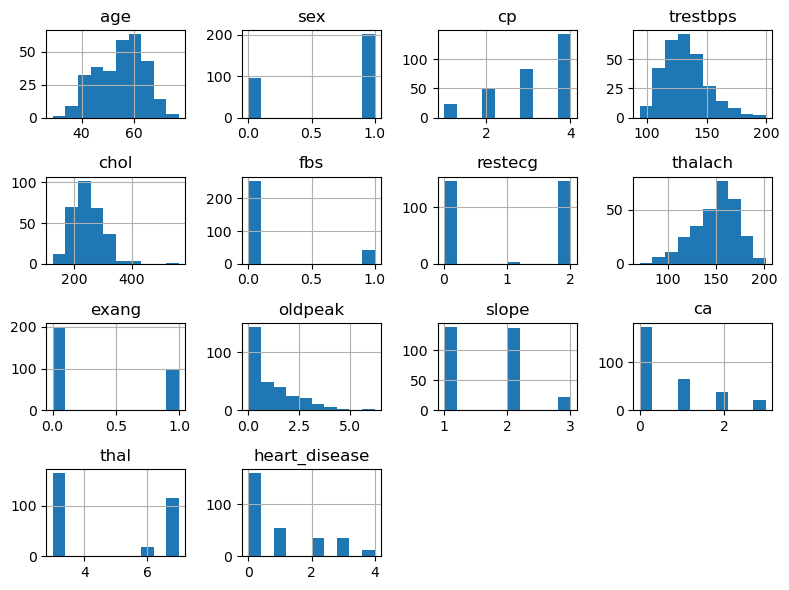

In [14]:
# Visualising numeric values using histograms

df.hist()
# reduce the size of the figure
fig = plt.gcf()
fig.set_size_inches(8, 6)
# ensure labels are visible
plt.tight_layout()

plt.show()

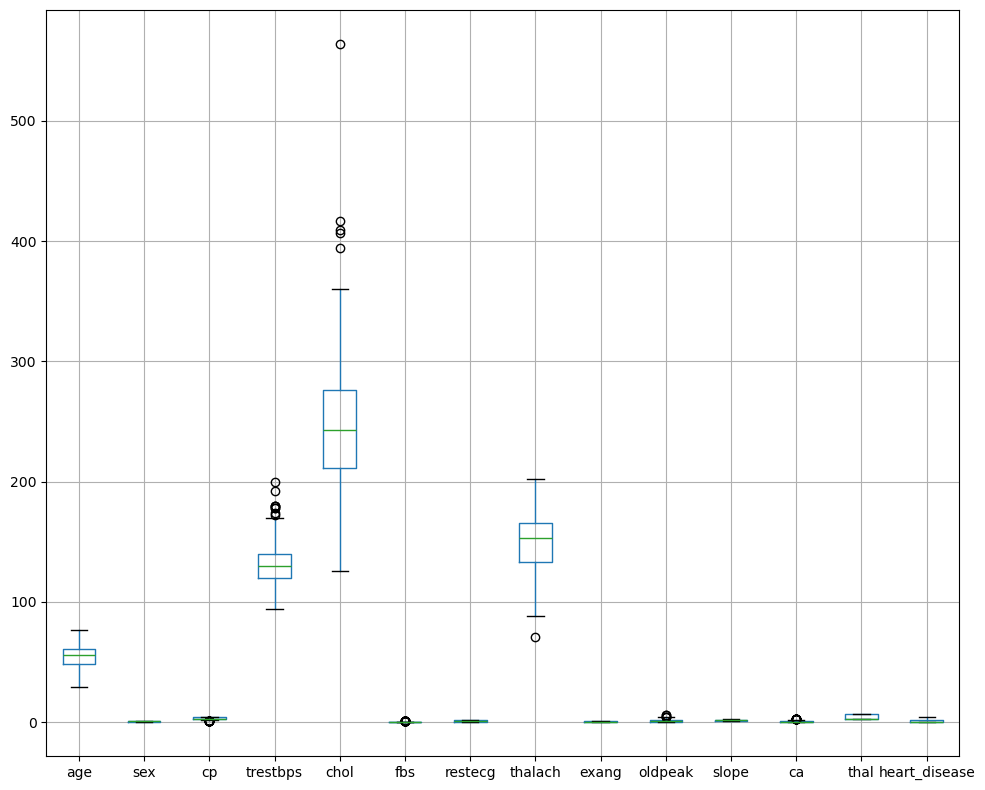

In [15]:
# Visualising numeric values using boxplots

df.boxplot()
# reduce the size of the figure
fig = plt.gcf()
fig.set_size_inches(10, 8)
# ensure labels are visible 
plt.tight_layout()

plt.show()

#### Analysing categorical variables using bar charts

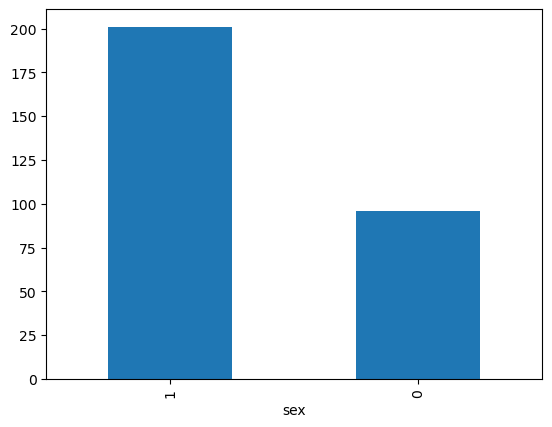

In [16]:
df['sex'].value_counts().plot(kind='bar')
plt.show()

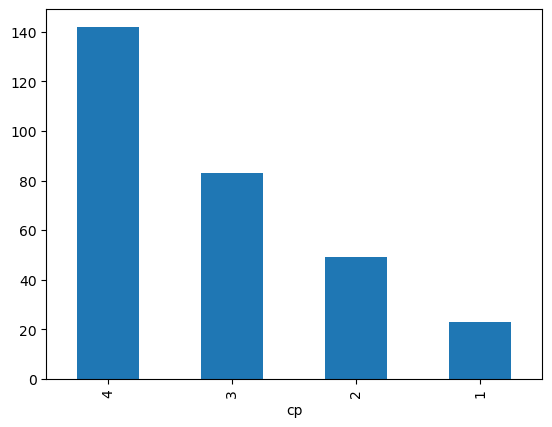

In [17]:
df['cp'].value_counts().plot(kind='bar')
plt.show()

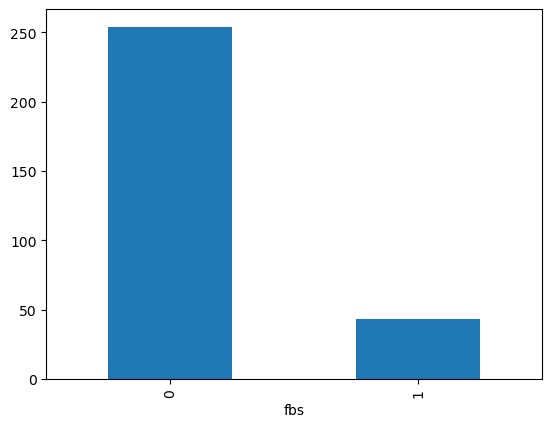

In [18]:
df['fbs'].value_counts().plot(kind='bar')
plt.show()

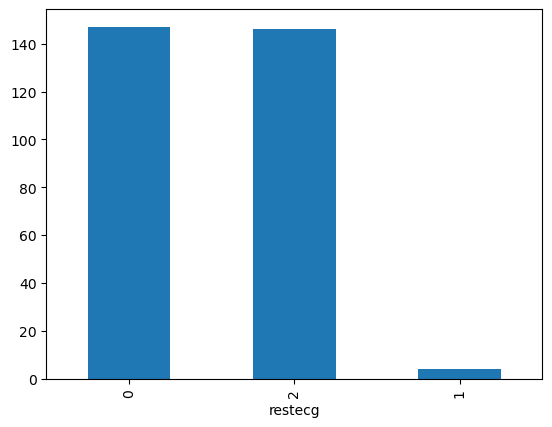

In [19]:
df['restecg'].value_counts().plot(kind='bar')
# fig = plt.gcf()
# fig.set_size_inches(10, 8)

plt.show()

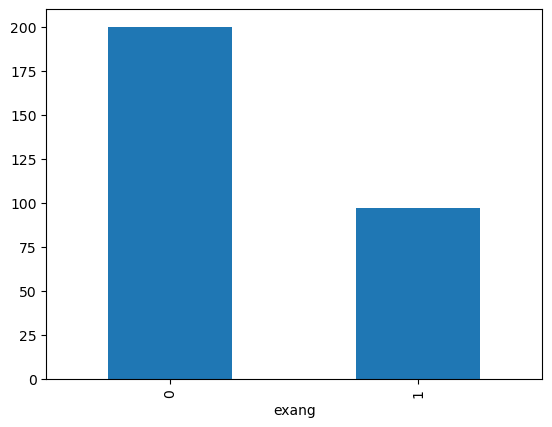

In [20]:
df['exang'].value_counts().plot(kind='bar')
plt.show()

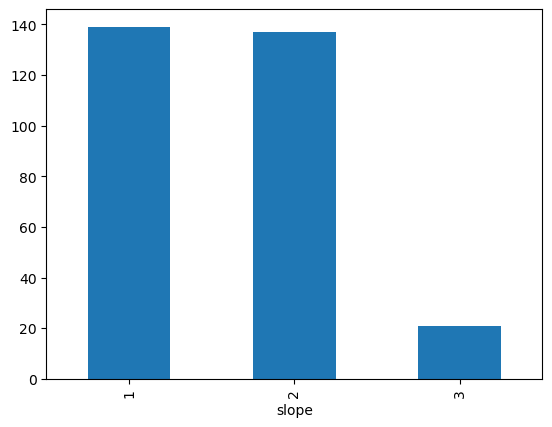

In [21]:
df['slope'].value_counts().plot(kind='bar')
plt.show()

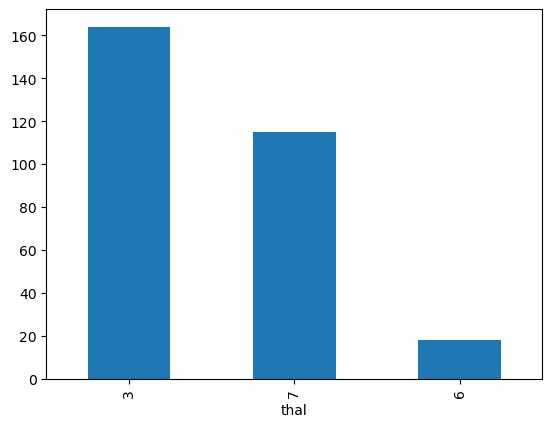

In [22]:
# analysing categorical variables using bar charts
df['thal'].value_counts().plot(kind='bar')
plt.show()

## Bivariate Analysis

#### Numerical-numerial Relationships

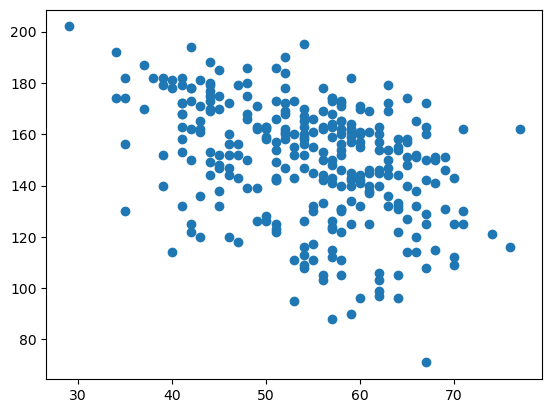

In [23]:
# Creating a scatterplot to expore relationships between numeric variables

plt.scatter(df['age'], df['thalach'])
plt.show()

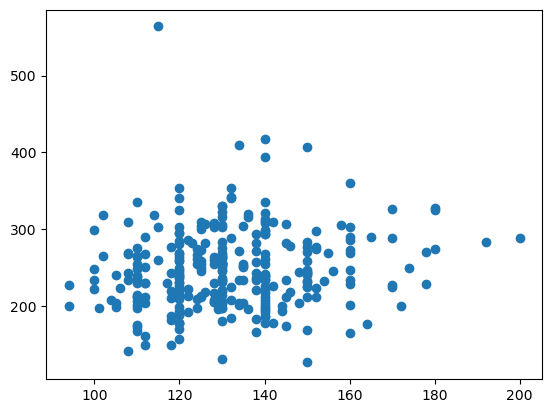

In [24]:
plt.scatter(df['trestbps'], df['chol'])
plt.show()

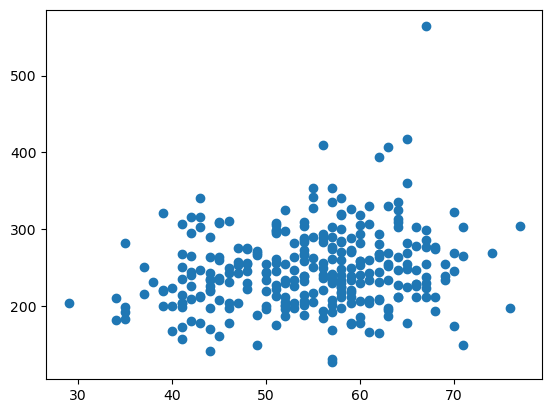

In [25]:
plt.scatter(df['age'], df['chol'])
plt.show()

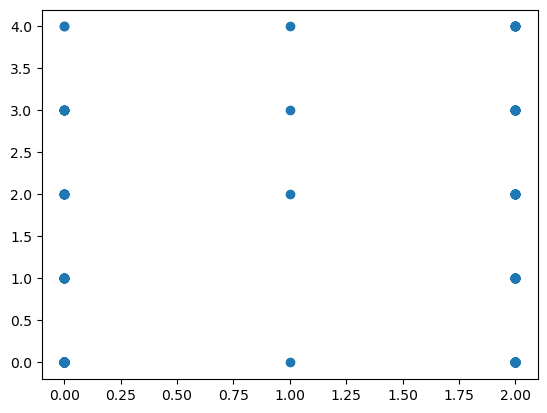

In [47]:
# plt.scatter(df['age'], df['heart_disease'])
# plt.scatter(df['heart_disease'], df['chol'])
# plt.scatter(df['thalach'], df['heart_disease'])
# plt.scatter(df['trestbps'], df['heart_disease'])
# plt.scatter(df['restecg'], df['heart_disease'])


plt.show()

In [27]:
# calculate correlation matrix of numerical columns
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
print(corr_matrix)

               trestbps      chol   thalach   oldpeak  heart_disease
trestbps       1.000000  0.131536 -0.049108  0.191243       0.159620
chol           0.131536  1.000000 -0.000075  0.038596       0.066448
thalach       -0.049108 -0.000075  1.000000 -0.347640      -0.420639
oldpeak        0.191243  0.038596 -0.347640  1.000000       0.501461
heart_disease  0.159620  0.066448 -0.420639  0.501461       1.000000


#### Categorical-Numerical Relationships

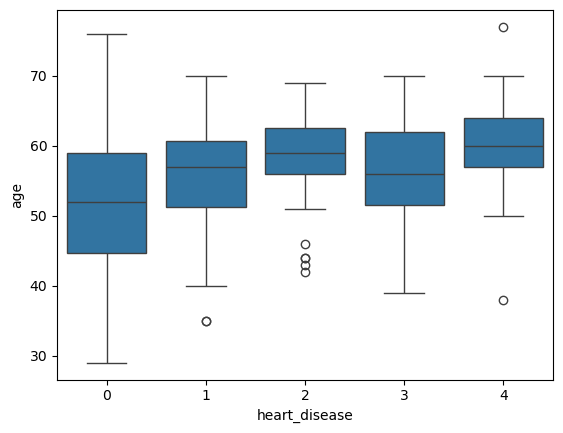

In [28]:
# comparing target across independent variables using boxplots
sns.boxplot(x='heart_disease', y='age', data=df)
plt.show()

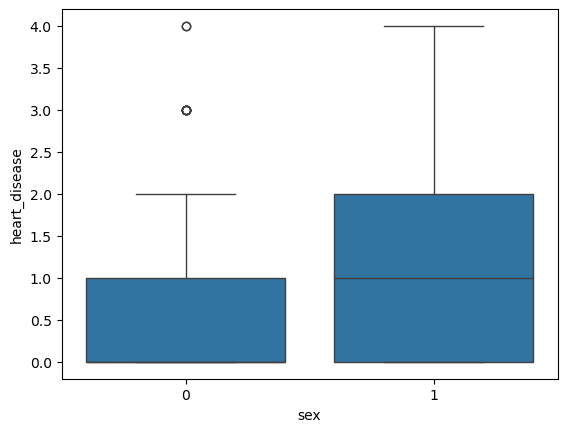

In [53]:
sns.boxplot(x='sex', y='heart_disease', data=df)
plt.show()

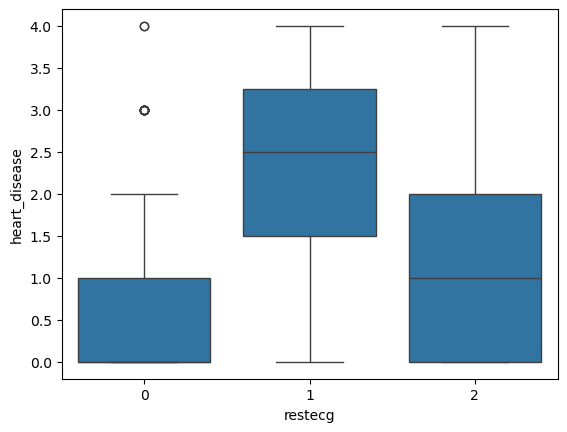

In [38]:
sns.boxplot(x='restecg', y='heart_disease', data=df)
plt.show()

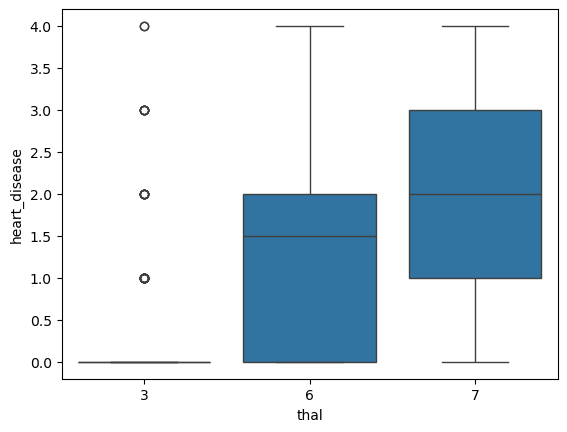

In [41]:
sns.boxplot(x='thal', y='heart_disease', data=df)
plt.show()

#### Categorical-Categorical Relationships

In [31]:
# Creating a crosstab to explore relationships between categorical variables
pd.crosstab(df['thal'], df['heart_disease'])

heart_disease,0,1,2,3,4
thal,,,,,
3,127,22,7,6,2
6,6,3,6,1,2
7,27,29,22,28,9


In [32]:
pd.crosstab(df['slope'], df['exang'])

exang,0,1
slope,,
1,113,26
2,75,62
3,12,9


In [33]:
pd.crosstab(df['fbs'], df['restecg'])

restecg,0,1,2
fbs,,,
0,129,4,121
1,18,0,25


In [34]:
pd.crosstab(df['sex'], df['cp'])

cp,1,2,3,4
sex,,,,
0,4,18,34,40
1,19,31,49,102


In [48]:
pd.crosstab(df['sex'], df['heart_disease'])

heart_disease,0,1,2,3,4
sex,,,,,
0,71,9,7,7,2
1,89,45,28,28,11


In [50]:
pd.crosstab(df['age'], df['heart_disease'])

heart_disease,0,1,2,3,4
age,,,,,
29,1,0,0,0,0
34,2,0,0,0,0
35,2,2,0,0,0
37,2,0,0,0,0
38,0,0,0,0,1
39,3,0,0,1,0
40,1,1,0,1,0
41,9,1,0,0,0
42,7,0,1,0,0


## Multivariate Analysis

<Figure size 800x600 with 0 Axes>

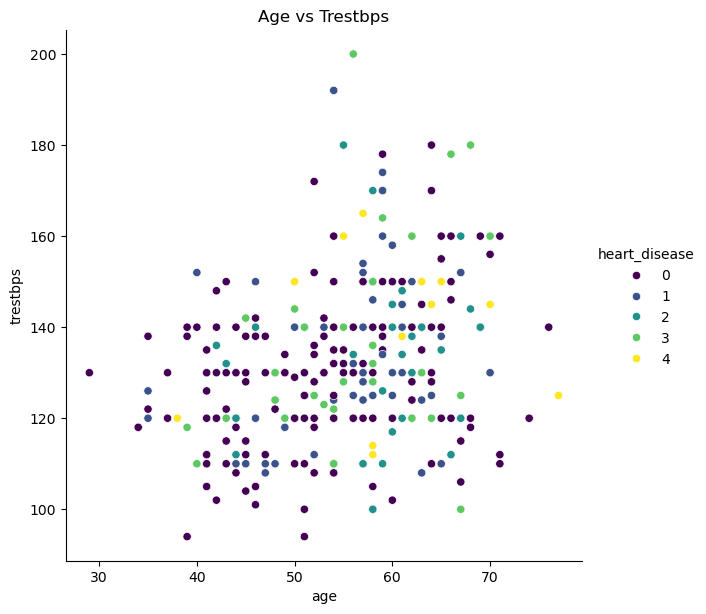

<Figure size 800x600 with 0 Axes>

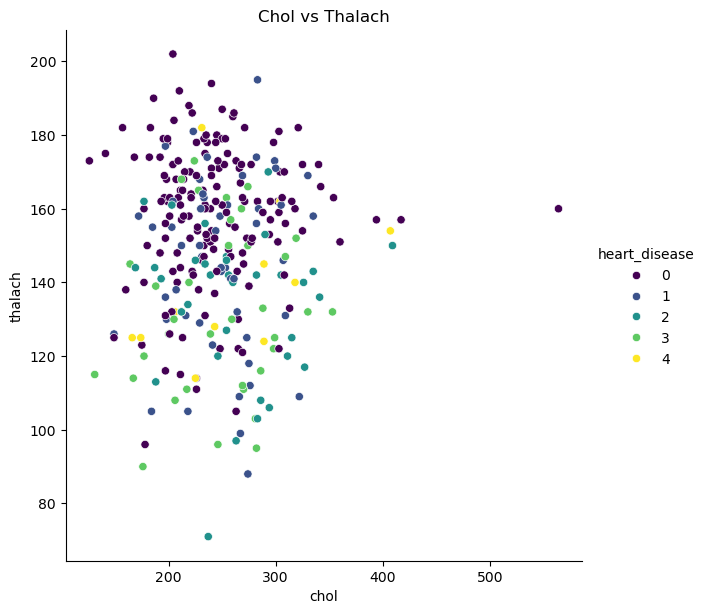

<Figure size 800x600 with 0 Axes>

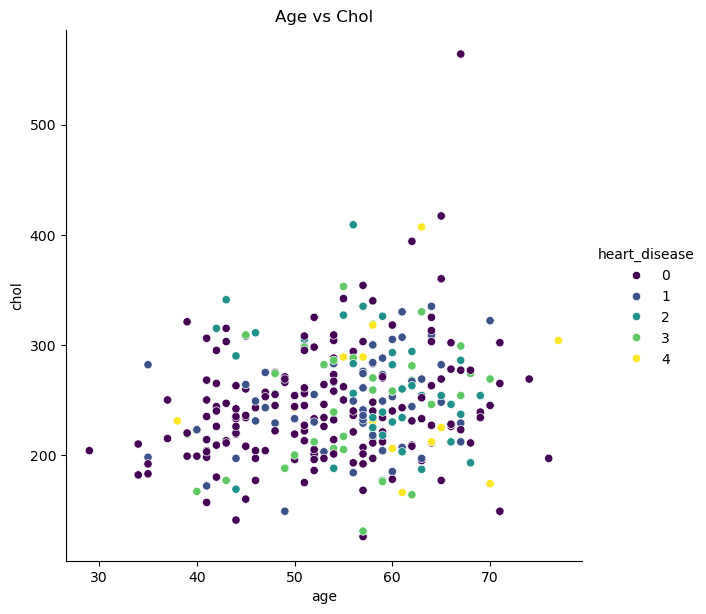

In [37]:
# List of variable pairs for individual pair plots
pairs = [
    ('age', 'trestbps'),
    ('chol', 'thalach'),
    ('age', 'chol')
]

# Generate separate pair plots
for x, y in pairs:
    plt.figure(figsize=(8, 6))
    sns.pairplot(df, x_vars=[x], y_vars=[y], hue='heart_disease', height=6, palette='viridis')
    plt.title(f'{x.capitalize()} vs {y.capitalize()}')
    plt.show()


c:\Users\Ann-VanessaLartey\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Ann-VanessaLartey\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Ann-VanessaLartey\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Ann-VanessaLartey\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Ann-VanessaLartey\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Ann-VanessaLartey\anaconda3\Lib\site-packages\seabo

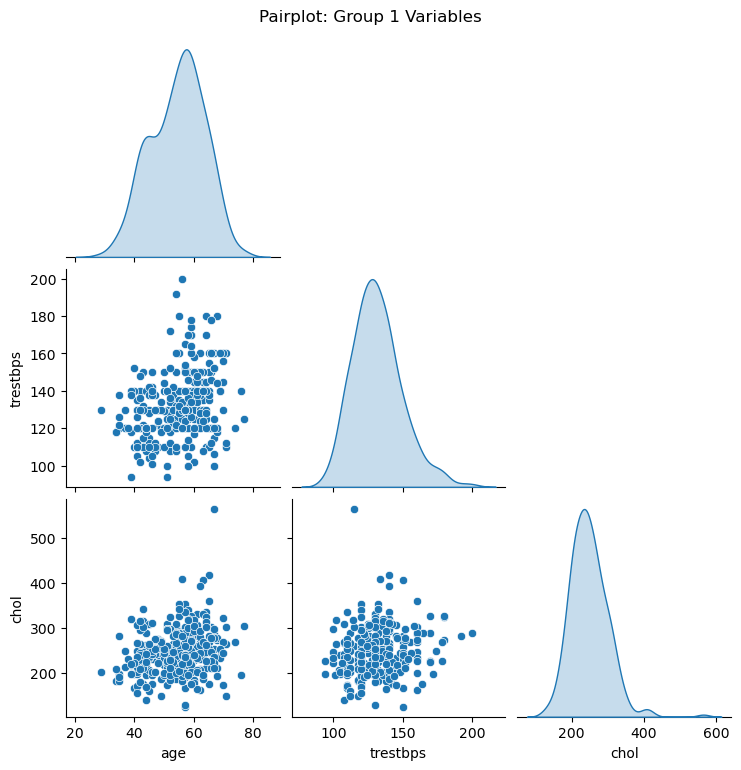

c:\Users\Ann-VanessaLartey\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Ann-VanessaLartey\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Ann-VanessaLartey\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Ann-VanessaLartey\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Ann-VanessaLartey\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Ann-VanessaLartey\anaconda3\Lib\site-packages\seabo

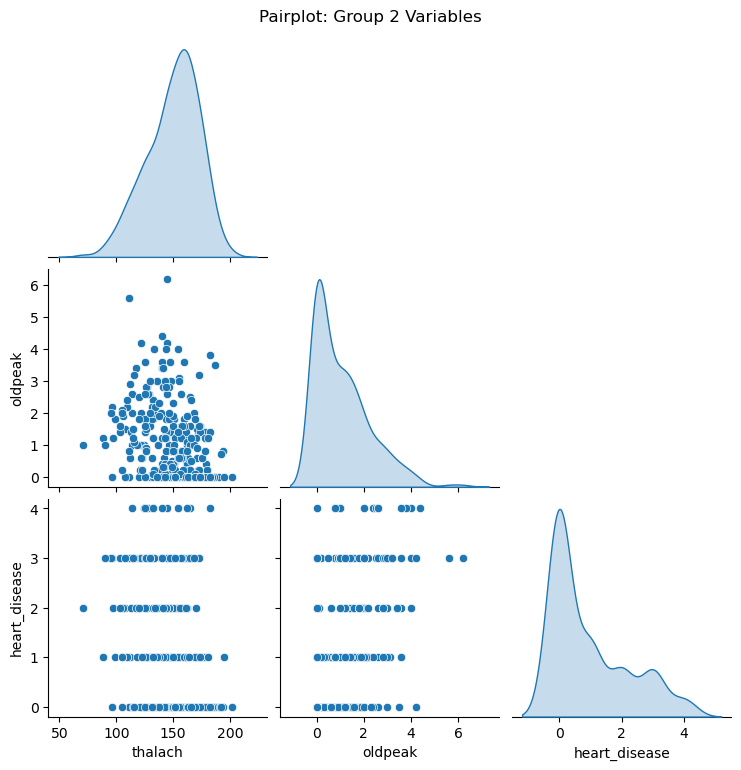

In [36]:
# Define groups of variables for pair plots
group1 = ['age', 'trestbps', 'chol']  # Group 1 variables
group2 = ['thalach', 'oldpeak', 'heart_disease']  # Group 2 variables

# Pairplot for Group 1
sns.pairplot(df[group1], height=2.5, diag_kind='kde', corner=True, palette='coolwarm')
plt.suptitle('Pairplot: Group 1 Variables', y=1.02)
plt.show()

# Pairplot for Group 2
sns.pairplot(df[group2], height=2.5, diag_kind='kde', corner=True, palette='coolwarm')
plt.suptitle('Pairplot: Group 2 Variables', y=1.02)
plt.show()
